In [1]:
from shapely.geometry import Point, Polygon 
import geopandas as gpd
import descartes

In [2]:
kings_county = gpd.read_file('C:/Users/egust/Desktop/KingCounty/School_Districts_in_King_County___schdst_area.shp')
kings_county_schools = gpd.read_file('C:/Users/egust/Desktop/School_Sites_in_King_County___schsite_point.shp')
kings_county_cpi = gpd.read_file('C:/Users/egust/Desktop/Common_Points_of_Interest_for_King_County____common_interest_point.shp')

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

data_kc_poi= pd.read_csv('Common_Points_of_Interest_for_King_County____common_interest_point.csv')
data_kc_poi.head()


,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE
0,-122.286944,47.499985,1,6002948,0.0,600,Green River Trail Site - Tukwila,Green River Trail Site - Tukwila,27th Ave S and S 112th St to 69th Ave S and S ...,98188
1,-122.305465,47.635532,2,828,0.0,600,Interlaken Park,Interlaken Park,Interlaken Pl & Delmar Dr E,98102
2,-122.211064,47.405961,3,374,0.0,600,Garrison Creek Park,Garrison Creek Park,S 218th St & 98th Ave S,98031
3,-121.912156,47.650466,4,1891,124849.0,390,Carnation Library,Carnation Lib,4804 Tolt Ave,98014
4,-122.295038,47.441348,5,1817,401027.0,60,Sea-Tac Office Center,Sea-Tac Office Center,18000 Pacific Hwy S,98188


In [4]:
data_kc_poi.loc[data_kc_poi['ZIPCODE'] == 98168]

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE
75,-122.269231,47.485805,76,351990,0.0,350,Days Inn South Seattle,Days Inn South Seattle,13050 48TH AVE S,98168
426,-122.353891,47.495072,427,6002978,0.0,600,Salmon Creek Waterway,Salmon Creek Waterway,1400 SW 122nd St,98168
500,-122.279996,47.474660,501,1272,21155.0,662,Foster High School,Foster,4242 S 144th St,98168
509,-122.274957,47.474829,510,2325,21156.0,661,Showalter Middle School,Showalter,4628 S 144th St,98168
511,-122.274086,47.474341,512,6600240,21157.0,665,Administration Center-Tukwila,Admin,4640 S 144th St,98168
...,...,...,...,...,...,...,...,...,...,...
6070,-122.292319,47.481484,6071,1267,21154.0,660,Cascade View Elementary School-Tukwila,Cascade View,13601 32nd Ave S,98168
6205,-122.340018,47.473733,6206,6002492,754983.0,600,Burien Community Center,Burien Community Center,425 SW 144th St,98168
6287,-122.277247,47.487718,6288,1515,0.0,420,Boeing Credit Union,Boeing Credit Union,12770 Gateway Dr,98168
6374,-122.292986,47.503290,6375,1651,0.0,360,Holiday Inn-Duwamish,Holiday Inn Duwamish,S 112th St & Pacific Hwy S,98168


Text(0.5, 244.35793477743903, 'Longitude')

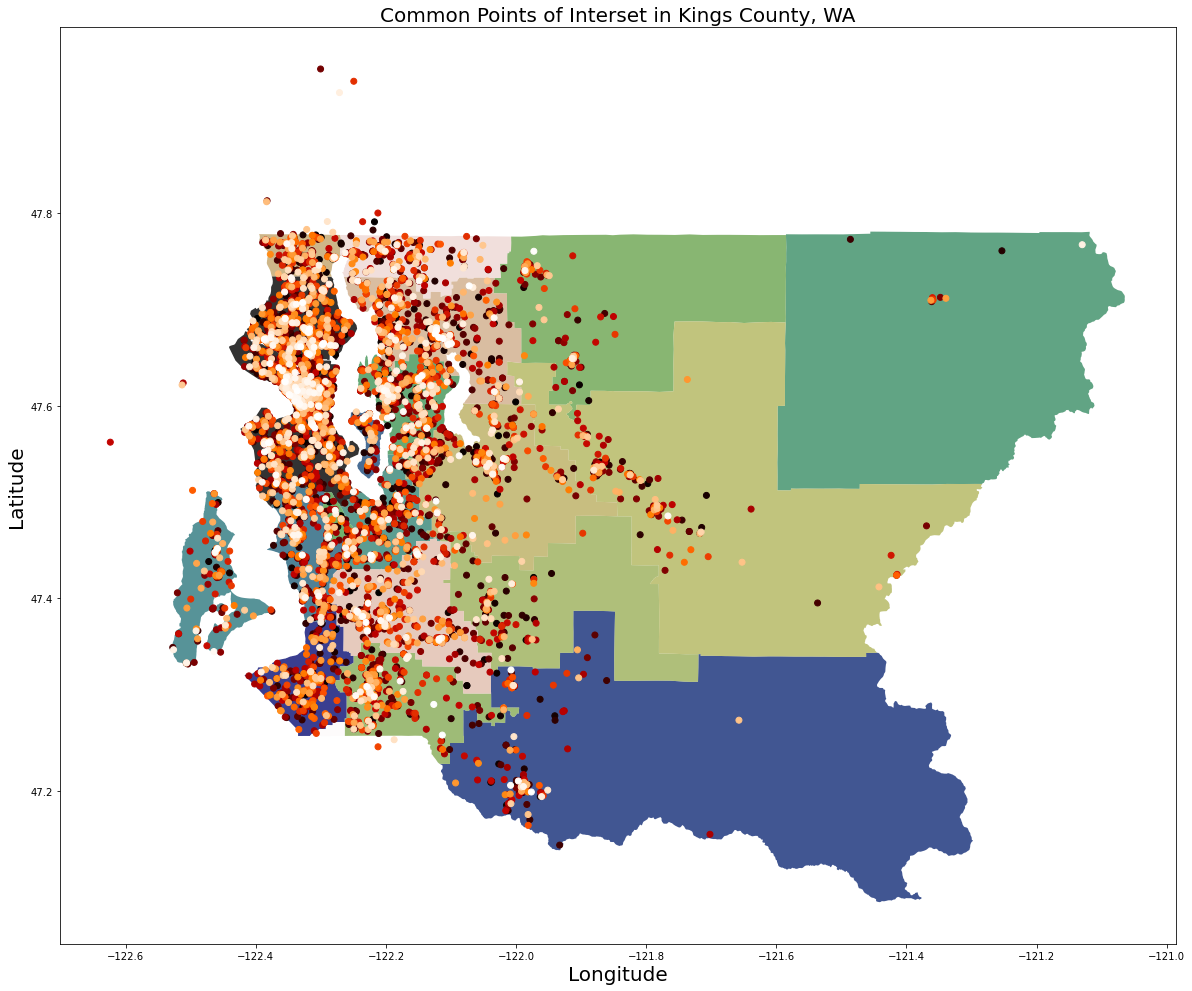

In [5]:
fig, ax = plt.subplots(figsize = (20,20))

kings_county.plot(ax=ax, alpha = 0.8, cmap = 'gist_earth')
kings_county_cpi.plot(ax=ax, cmap = 'gist_heat')

ax.set_title('Common Points of Interset in Kings County, WA', fontdict = {'fontsize':20})
ax.set_ylabel('Latitude', fontdict = {'fontsize' : 20})
ax.set_xlabel('Longitude', fontdict = {'fontsize' : 20})

# School Sites 

In [6]:
data_kc_schsite= pd.read_csv('School_Sites_in_King_County___schsite_point.csv')
data_kc_schsite.head()

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE,LONG_CEN,LAT_CEN,SCH_CLASS,DISTRICT,PIN,MAJOR,MINOR,FEATUREDES,OSPI_CODE
0,-122.152303,47.608461,1,207,80,662,Sammamish High School,Sammamish,100 140th Ave SE,98005,-122.152304,47.608458,10.0,BELLEVUE,3.425059e+09,342505.0,9019.0,School-High,3282.0
1,-122.205415,47.768906,2,263,113,660,Saint Brendan Catholic School,Saint Brendan,10049 NE 195th St,98011,-122.205416,47.768905,20.0,NORTHSHORE,5.260591e+08,52605.0,9084.0,School-Elementary,0.0
2,-122.348454,47.525265,3,884,527409,660,Highland Park Elementary School,Highland Park,1012 SW Trenton St,98106,-122.348456,47.525263,10.0,SEATTLE,7.972603e+09,797260.0,3210.0,School-Elementary,2269.0
3,-122.200170,47.667245,4,475,8634,660,Lakeview Elementary School,Lakeview,10400 NE 68th St,98033,-122.200171,47.667242,10.0,LAKE WASHINGTON,7.882600e+09,788260.0,132.0,School-Elementary,3041.0
4,-122.294727,47.708042,5,1093,12282,662,Nathan Hale High School,Nathan Hale,10750 30th Ave NE,98125,-122.294728,47.708040,10.0,SEATTLE,2.826049e+09,282604.0,9152.0,School-High,3479.0


In [7]:
data_kc_schsite.columns= data_kc_schsite.columns.str.lower()
data_kc_schsite.head()

,x,y,objectid,feature_id,esite,code,name,abb_name,address,zipcode,long_cen,lat_cen,sch_class,district,pin,major,minor,featuredes,ospi_code
0,-122.152303,47.608461,1,207,80,662,Sammamish High School,Sammamish,100 140th Ave SE,98005,-122.152304,47.608458,10.0,BELLEVUE,3.425059e+09,342505.0,9019.0,School-High,3282.0
1,-122.205415,47.768906,2,263,113,660,Saint Brendan Catholic School,Saint Brendan,10049 NE 195th St,98011,-122.205416,47.768905,20.0,NORTHSHORE,5.260591e+08,52605.0,9084.0,School-Elementary,0.0
2,-122.348454,47.525265,3,884,527409,660,Highland Park Elementary School,Highland Park,1012 SW Trenton St,98106,-122.348456,47.525263,10.0,SEATTLE,7.972603e+09,797260.0,3210.0,School-Elementary,2269.0
3,-122.200170,47.667245,4,475,8634,660,Lakeview Elementary School,Lakeview,10400 NE 68th St,98033,-122.200171,47.667242,10.0,LAKE WASHINGTON,7.882600e+09,788260.0,132.0,School-Elementary,3041.0
4,-122.294727,47.708042,5,1093,12282,662,Nathan Hale High School,Nathan Hale,10750 30th Ave NE,98125,-122.294728,47.708040,10.0,SEATTLE,2.826049e+09,282604.0,9152.0,School-High,3479.0


In [8]:
data_kc_schsite['district']= data_kc_schsite['district'].str.lower()

In [9]:
data_kc_schsite.dropna(subset=['district'], inplace=True)
data_kc_schsite.isnull().sum()

x              0
y              0
objectid       0
feature_id     0
esite          0
code           0
name           0
abb_name       0
address        0
zipcode        0
long_cen       0
lat_cen        0
sch_class      0
district       0
pin            0
major          0
minor          0
featuredes     0
ospi_code     35
dtype: int64

In [10]:
data_schsite = data_kc_schsite.loc[:, ['zipcode', 'long_cen', 'lat_cen', 'district', 'featuredes']]
data_schsite_list = data_schsite['district'].unique().tolist()

In [11]:
data_schsite_list

['bellevue',
 'northshore',
 'seattle',
 'lake washington',
 'highline',
 'renton',
 'snoqualmie valley',
 'auburn',
 'kent',
 'federal way',
 'enumclaw',
 'issaquah',
 'shoreline',
 'tahoma',
 'vashon island',
 'riverview',
 'mercer island',
 'tukwila',
 'skykomish']

In [12]:
data_schsite.groupby('district').count()['zipcode']

district
auburn                33
bellevue              48
enumclaw              10
federal way           44
highline              44
issaquah              30
kent                  44
lake washington       64
mercer island         12
northshore            31
renton                30
riverview              8
seattle              183
shoreline             25
skykomish              1
snoqualmie valley     12
tahoma                11
tukwila                6
vashon island          5
Name: zipcode, dtype: int64

In [13]:
district_zip = {}

for i in range(len(data_schsite_list)):
    x = data_schsite_list[i]
    district_zip[x] = data_schsite.loc[data_schsite['district'] == x].sort_values(['zipcode']).zipcode.unique().tolist()


In [14]:
district_zip

{'bellevue': [98004, 98005, 98006, 98007, 98008, 98039, 98121],
 'northshore': [98011, 98028, 98052, 98072, 98077],
 'seattle': [98101,
  98102,
  98103,
  98104,
  98105,
  98106,
  98107,
  98108,
  98109,
  98112,
  98115,
  98116,
  98117,
  98118,
  98119,
  98121,
  98122,
  98125,
  98126,
  98133,
  98134,
  98136,
  98144,
  98146,
  98177,
  98178,
  98195,
  98199],
 'lake washington': [98028, 98033, 98034, 98052, 98053, 98074, 98077],
 'highline': [98146, 98148, 98166, 98168, 98188, 98198],
 'renton': [98055, 98056, 98057, 98058, 98059, 98178],
 'snoqualmie valley': [98024, 98045, 98065],
 'auburn': [98001, 98002, 98047, 98092],
 'kent': [98010, 98030, 98031, 98032, 98042, 98058, 98198],
 'federal way': [98001, 98003, 98023, 98032, 98198],
 'enumclaw': [98010, 98022],
 'issaquah': [98006, 98008, 98027, 98029, 98059, 98065, 98075],
 'shoreline': [98133, 98155, 98177],
 'tahoma': [98038, 98042, 98051],
 'vashon island': [98070],
 'riverview': [98014, 98019],
 'mercer island':

In [15]:
for key in district_zip:
    if 98168 in district_zip[key]:
        print(key)

highline
tukwila


In [16]:
df_district_zip = pd.DataFrame(list(district_zip.items()),columns = ['district','zipcode']) 
df_district_zip

,district,zipcode
0,bellevue,"[98004, 98005, 98006, 98007, 98008, 98039, 98121]"
1,northshore,"[98011, 98028, 98052, 98072, 98077]"
2,seattle,"[98101, 98102, 98103, 98104, 98105, 98106, 981..."
3,lake washington,"[98028, 98033, 98034, 98052, 98053, 98074, 98077]"
4,highline,"[98146, 98148, 98166, 98168, 98188, 98198]"
5,renton,"[98055, 98056, 98057, 98058, 98059, 98178]"
6,snoqualmie valley,"[98024, 98045, 98065]"
7,auburn,"[98001, 98002, 98047, 98092]"
8,kent,"[98010, 98030, 98031, 98032, 98042, 98058, 98198]"
9,federal way,"[98001, 98003, 98023, 98032, 98198]"


In [17]:
kc_sch_district_grades = pd.read_csv('King_County_Sch_District_Grades.csv')
kc_sch_district_grades = kc_sch_district_grades.drop('Unnamed: 0', axis=1)
kc_sch_district_grades

,district,grade,total_sch,total_student
0,mercer island,A+,6,"4,522"
1,bellevue,A+,31,"21,609"
2,lake washington,A+,55,"30,675"
3,issaquah,A+,27,"20,897"
4,tahoma,A,9,"8,906"
5,shoreline,A,19,"9,899"
6,vashon island,A,5,"1,585"
7,snoqualmie valley,A-,13,"7,214"
8,seattle,A-,108,"55,271"
9,riverview,B+,9,"3,482"


In [18]:
# Missing district Northshore
north_shore = {'district': ['northshore'], 
               'grade': ['A'],
               'total_sch': ['39'],
               'total_student': ['23500']}
df_ns = pd.DataFrame(north_shore, columns = ['district','grade', 'total_sch', 'total_student'])
df_ns

,district,grade,total_sch,total_student
0,northshore,A,39,23500


In [19]:
kc_sch_district_grades = pd.concat([kc_sch_district_grades,df_ns])
kc_sch_district_grades

,district,grade,total_sch,total_student
0,mercer island,A+,6,"4,522"
1,bellevue,A+,31,"21,609"
2,lake washington,A+,55,"30,675"
3,issaquah,A+,27,"20,897"
4,tahoma,A,9,"8,906"
5,shoreline,A,19,"9,899"
6,vashon island,A,5,"1,585"
7,snoqualmie valley,A-,13,"7,214"
8,seattle,A-,108,"55,271"
9,riverview,B+,9,"3,482"


In [20]:
kc_school_district = kc_sch_district_grades.join(df_district_zip.set_index('district'), on='district')
kc_school_district

,district,grade,total_sch,total_student,zipcode
0,mercer island,A+,6,"4,522",[98040]
1,bellevue,A+,31,"21,609","[98004, 98005, 98006, 98007, 98008, 98039, 98121]"
2,lake washington,A+,55,"30,675","[98028, 98033, 98034, 98052, 98053, 98074, 98077]"
3,issaquah,A+,27,"20,897","[98006, 98008, 98027, 98029, 98059, 98065, 98075]"
4,tahoma,A,9,"8,906","[98038, 98042, 98051]"
5,shoreline,A,19,"9,899","[98133, 98155, 98177]"
6,vashon island,A,5,"1,585",[98070]
7,snoqualmie valley,A-,13,"7,214","[98024, 98045, 98065]"
8,seattle,A-,108,"55,271","[98101, 98102, 98103, 98104, 98105, 98106, 981..."
9,riverview,B+,9,"3,482","[98014, 98019]"


In [21]:
grade_rank= {'grade': ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F'],
             'grade_num': [13,12,11,10,9,8,7,6,5,4,3,2,1]}
df_grade_rank = pd.DataFrame(grade_rank, columns = ['grade','grade_num'])
df_grade_rank

,grade,grade_num
0,A+,13
1,A,12
2,A-,11
3,B+,10
4,B,9
5,B-,8
6,C+,7
7,C,6
8,C-,5
9,D+,4


In [22]:
kc_school_district = kc_school_district.join(df_grade_rank.set_index('grade'), on='grade')
kc_school_district

,district,grade,total_sch,total_student,zipcode,grade_num
0,mercer island,A+,6,"4,522",[98040],13
1,bellevue,A+,31,"21,609","[98004, 98005, 98006, 98007, 98008, 98039, 98121]",13
2,lake washington,A+,55,"30,675","[98028, 98033, 98034, 98052, 98053, 98074, 98077]",13
3,issaquah,A+,27,"20,897","[98006, 98008, 98027, 98029, 98059, 98065, 98075]",13
4,tahoma,A,9,"8,906","[98038, 98042, 98051]",12
5,shoreline,A,19,"9,899","[98133, 98155, 98177]",12
6,vashon island,A,5,"1,585",[98070],12
7,snoqualmie valley,A-,13,"7,214","[98024, 98045, 98065]",11
8,seattle,A-,108,"55,271","[98101, 98102, 98103, 98104, 98105, 98106, 981...",11
9,riverview,B+,9,"3,482","[98014, 98019]",10


In [23]:
kc_school_district.sort_values(by='grade_num', ascending=False, inplace=True)

In [26]:
kc_school_district.reset_index(inplace=True, drop=True)
kc_school_district.drop('index', axis=1, inplace=True)

In [28]:
kc_school_district

,district,grade,total_sch,total_student,zipcode,grade_num
0,mercer island,A+,6,"4,522",[98040],13
1,lake washington,A+,55,"30,675","[98028, 98033, 98034, 98052, 98053, 98074, 98077]",13
2,issaquah,A+,27,"20,897","[98006, 98008, 98027, 98029, 98059, 98065, 98075]",13
3,bellevue,A+,31,"21,609","[98004, 98005, 98006, 98007, 98008, 98039, 98121]",13
4,vashon island,A,5,"1,585",[98070],12
5,northshore,A,39,23500,"[98011, 98028, 98052, 98072, 98077]",12
6,shoreline,A,19,"9,899","[98133, 98155, 98177]",12
7,tahoma,A,9,"8,906","[98038, 98042, 98051]",12
8,snoqualmie valley,A-,13,"7,214","[98024, 98045, 98065]",11
9,seattle,A-,108,"55,271","[98101, 98102, 98103, 98104, 98105, 98106, 981...",11


In [55]:
kc_school_district.zipcode[0]

[98040]

In [29]:
kc_school_district.to_csv('kc_school_district.csv')

In [30]:
def district(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                district = kc_school_district['district'][key]
    except Exception:
        pass
    return district

In [31]:
def districts(zipcodes):
    try:
        x = district(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [32]:
district_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    district_KC.append(districts(zipcode))

In [33]:
def grade(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                grade = kc_school_district['grade'][key]
    except Exception:
        pass
    return grade

In [34]:
def grades(zipcodes):
    try:
        x = grade(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [35]:
grades_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    grades_KC.append(grades(zipcode))

In [36]:
def total_sch(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                total_sch = kc_school_district['total_sch'][key]
    except Exception:
        pass
    return total_sch

In [37]:
def total_schs(zipcodes):
    try:
        x = total_sch(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [38]:
total_schs_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    total_schs_KC.append(total_schs(zipcode))

In [39]:
def total_student(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                total_student = kc_school_district['total_student'][key]
    except Exception:
        pass
    return total_student

In [40]:
def total_students(zipcodes):
    try:
        x = total_student(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [41]:
total_student_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    total_student_KC.append(total_students(zipcode))

In [42]:
def grade_num(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                grade_num = kc_school_district['grade_num'][key]
    except Exception:
        pass
    return grade_num

In [43]:
def grade_nums(zipcodes):
    try:
        x = grade_num(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [44]:
grade_nums_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    grade_nums_KC.append(grade_nums(zipcode))

In [45]:
x = {'district': district_KC, 
     'grade': grades_KC,
     'grade_num': grade_nums_KC,
     'total_sch': total_schs_KC,
     'total_student': total_student_KC} 

In [46]:
df_poi_school = pd.DataFrame(x, columns = ['district','grade','grade_num','total_sch','total_student'])
df_poi_school

,district,grade,grade_num,total_sch,total_student
0,tukwila,C+,7,8,"3,046"
1,seattle,A-,11,108,"55,271"
2,kent,B,9,44,"27,291"
3,riverview,B+,10,9,"3,482"
4,tukwila,C+,7,8,"3,046"
...,...,...,...,...,...
6486,northshore,A,12,39,23500
6487,seattle,A-,11,108,"55,271"
6488,seattle,A-,11,108,"55,271"
6489,vashon island,A,12,5,"1,585"


In [48]:
data_kc_poi = pd.concat([data_kc_poi, df_poi_school], axis=1)

In [49]:
data_kc_poi

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE,district,grade,grade_num,total_sch,total_student
0,-122.286944,47.499985,1,6002948,0.0,600,Green River Trail Site - Tukwila,Green River Trail Site - Tukwila,27th Ave S and S 112th St to 69th Ave S and S ...,98188,tukwila,C+,7,8,"3,046"
1,-122.305465,47.635532,2,828,0.0,600,Interlaken Park,Interlaken Park,Interlaken Pl & Delmar Dr E,98102,seattle,A-,11,108,"55,271"
2,-122.211064,47.405961,3,374,0.0,600,Garrison Creek Park,Garrison Creek Park,S 218th St & 98th Ave S,98031,kent,B,9,44,"27,291"
3,-121.912156,47.650466,4,1891,124849.0,390,Carnation Library,Carnation Lib,4804 Tolt Ave,98014,riverview,B+,10,9,"3,482"
4,-122.295038,47.441348,5,1817,401027.0,60,Sea-Tac Office Center,Sea-Tac Office Center,18000 Pacific Hwy S,98188,tukwila,C+,7,8,"3,046"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,-122.112514,47.669697,6487,2292,354427.0,530,Bartell Drugs-Redmond Towne Center,Bartell Drugs-Redmond Towne Center,7370 170th Ave NE,98052,northshore,A,12,39,23500
6487,-122.378333,47.643655,6488,6007226,0.0,600,Interbay Golf,Interbay Golf,2501 15th Ave W,98119,seattle,A-,11,108,"55,271"
6488,-122.336448,47.615441,6489,1691,835568.0,60,Love Bldg,Love Bldg,1925 8th Ave,98101,seattle,A-,11,108,"55,271"
6489,-122.459065,47.451750,6490,772,0.0,600,Ober Park,Ober Park,17100 Vashon Hwy SW,98070,vashon island,A,12,5,"1,585"


Text(0.5, 310.3034246844864, 'Longitude')

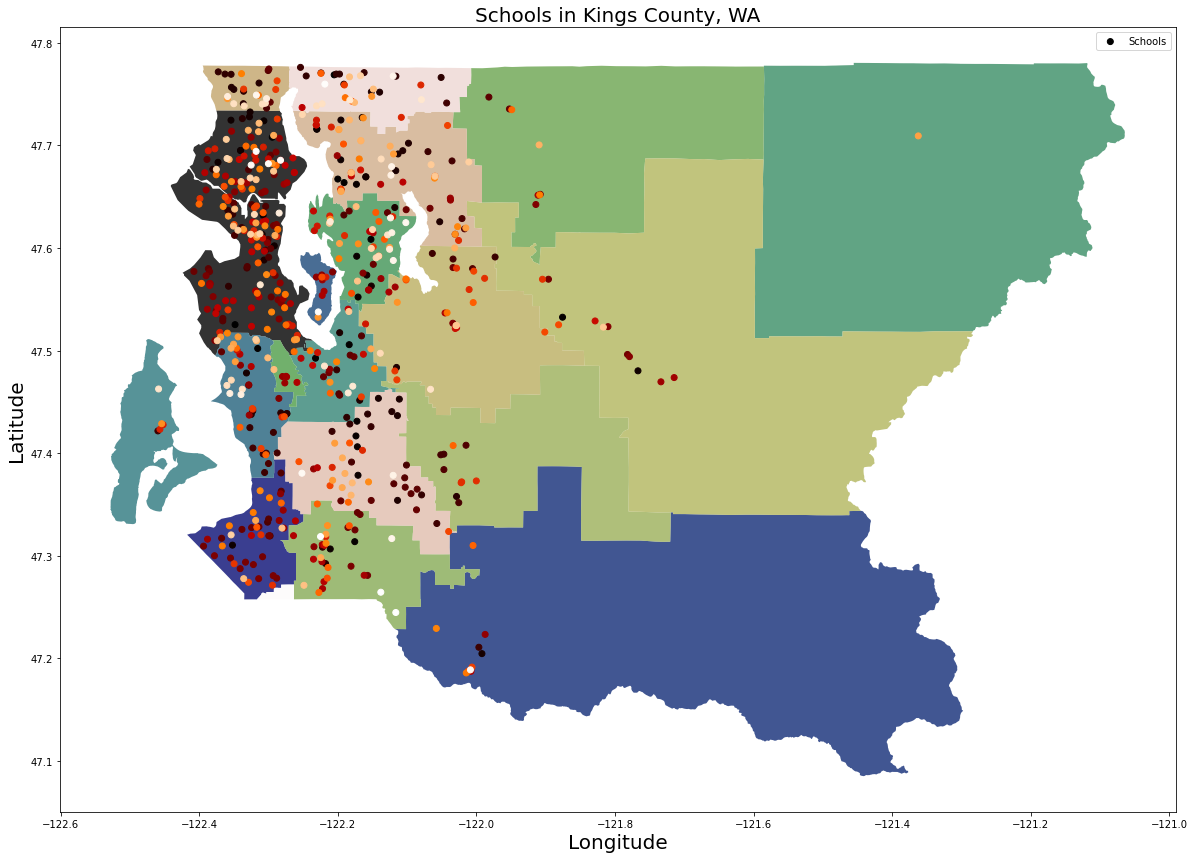

In [50]:
fig, ax = plt.subplots(figsize = (20,20))

kings_county.plot(ax=ax, alpha = 0.8, cmap = 'gist_earth')
kings_county_schools.plot(ax=ax, cmap = 'gist_heat', label = 'Schools')

plt.legend(prop = {'size':10} )
ax.set_title('Schools in Kings County, WA', fontdict = {'fontsize':20})
ax.set_ylabel('Latitude', fontdict = {'fontsize' : 20})
ax.set_xlabel('Longitude', fontdict = {'fontsize' : 20})